# Lecture 8 Workbook
## ANOVA
This is a workbook that contains the python code that was used in slides
appearing in the lecture. It is provided so that you can see for yourself
how this code works.

## Definitions and setup
Code here is just for making everything look sort of *uniform*

In [146]:
%matplotlib inline
from itertools import islice
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from scipy import stats 
from sklearn.linear_model import LinearRegression
import pandas as pd
from IPython.display import HTML


In [147]:
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10

This is the seed for the random number generator. Graphs for the course will be generated with seed 367 (for BME). You can change it or use 'shuffle' to get different pseudo-random numbers each time.

In [148]:
np.random.seed(367)

## Load data
Load data on cerebellar volumes

In [149]:
cblm_data = pd.read_csv('cerebellar_volumes.csv')

diet_column_names = ['plaque', 'D0', 'D1', 'D2', 'D3', 'group']
diet_data = pd.read_csv('cholest.dat', delim_whitespace=True, header=None, names=diet_column_names)



## Multiple groups

In [150]:
healthy = np.array([2.5, 7.2, 8.9, 9.3, 9.9, 10.3, 11.6, 14.8, 4.5, 7.0, 8.5, 9.3, 9.8, 10.3, 11.6, 11.7])
nH = len(healthy)
nonmelanchonic = np.array([5.4, 7.8, 8.0, 9.3, 9.7, 11.1, 11.6, 12.0, 12.8, 13.1, 15.8, 7.5, 7.9, 7.6, 9.4, 9.6, 11.3, 11.6, 11.8, 12.6, 13.2, 16.3])
nN = len(nonmelanchonic)
melanchonic = np.array([8.1, 9.5, 9.8, 12.2, 12.3, 12.5, 13.3, 17.5, 24.3, 10.1, 11.8, 9.8, 12.1, 12.5, 12.5, 13.4, 16.1, 25.2])
nM = len(melanchonic)
N = nH + nN + nM

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x7f08784cde40>,
 [Text(0, 0, 'Healthy'),
  Text(1, 0, 'Nonmelanchonic'),
  Text(2, 0, 'Melanchonic')])

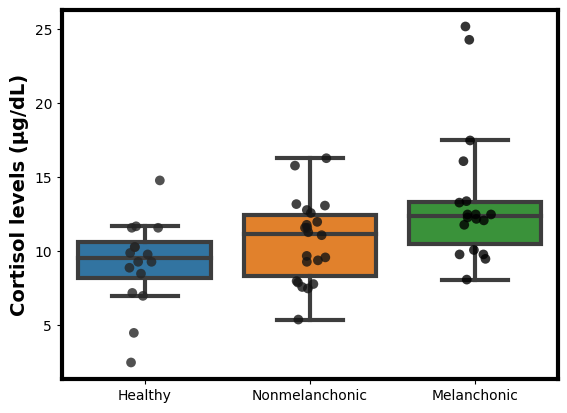

In [151]:
data = [healthy, nonmelanchonic, melanchonic]
labels = ['Healthy', 'Nonmelanchonic', 'Melanchonic']

sns.boxplot(data=data, showfliers=False)
sns.stripplot(data=data, color='black', alpha=0.8, size=7)
plt.ylabel('Cortisol levels (μg/dL)')
plt.xticks(range(len(labels)), labels)


In [152]:
C = np.concatenate([healthy, nonmelanchonic, melanchonic])
D = np.ones(N)
DM = np.concatenate([np.zeros(nH), np.ones(nN), np.zeros(nM)])
DN = np.concatenate([np.zeros(nH), np.zeros(nN), np.ones(nM)])
X = np.column_stack((D, DM, DN))

regressor = LinearRegression(fit_intercept=False)
regressor.fit(X, C)
b_H = regressor.coef_[0]
b_M = regressor.coef_[1]
b_N = regressor.coef_[2]

y_pred = regressor.predict(X)
SSReg = np.sum((y_pred - np.mean(C))**2)
SSRes = np.sum((C - y_pred)**2)
SSTot = SSReg + SSRes

R2 = SSReg / SSTot
Cohenf = SSReg / SSRes

dfReg = 2
dfRes = N - dfReg - 1

F = (SSReg / dfReg) / (SSRes / dfRes)
p = 1 - stats.f.cdf(F, dfReg, dfRes)


Text(0.2, 0.2, "$b_H = 9.2000$\n$b_M = 1.5000$\n$b_N = 4.3000$\n$R^2 = 0.20$\nCohen's $f = 0.25$\n$F(2, 53) = 6.61$\n$p = 0.0027321$")

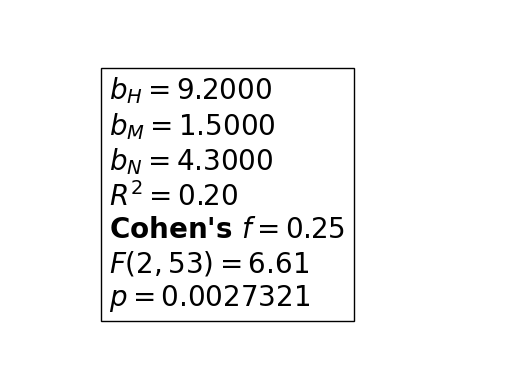

In [153]:
plt.axis('off')
plt.text(0.2, 0.2, f"$b_H = {b_H:.4f}$\n$b_M = {b_M:.4f}$\n$b_N = {b_N:.4f}$\n"
           f"$R^2 = {R2:.2f}$\nCohen's $f = {Cohenf:.2f}$\n"
           f"$F({dfReg}, {dfRes}) = {F:.2f}$\n$p = {p:.5g}$",
         fontsize=20, fontweight='bold', bbox=dict(boxstyle='square', facecolor='white'))

In [154]:

healthyBar = np.mean(healthy)
nonmelBar = np.mean(nonmelanchonic)
melBar = np.mean(melanchonic)
grandMean = np.mean(np.concatenate([healthy, nonmelanchonic, melanchonic]))

SSBetween = nH * (healthyBar - grandMean) ** 2 + nN * (nonmelBar - grandMean) ** 2 + nM * (melBar - grandMean) ** 2
SSWithin = np.sum((healthy - healthyBar) ** 2) + np.sum((nonmelanchonic - nonmelBar) ** 2) + np.sum((melanchonic - melBar) ** 2)

dfBetween = 2
dfWithin = N - 3

F = (SSBetween / dfBetween) / (SSWithin / dfWithin)



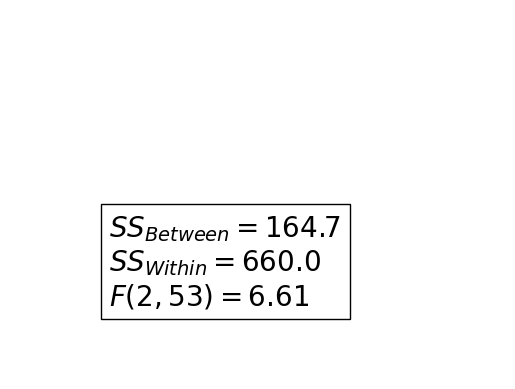

In [155]:
plt.axis('off')
plt.text(0.2, 0.2, f"$SS_{{Between}} = {SSBetween:.1f}$\n$SS_{{Within}} = {SSWithin:.1f}$\n"
           f"$F({dfBetween}, {dfWithin}) = {F:.2f}$",
         fontsize=20, fontweight='bold', bbox=dict(boxstyle='square', facecolor='white'))
plt.show()

In [156]:
plaque = diet_data['plaque']
group = diet_data['group']
numGroups = len(np.unique(group))
N = len(plaque)
nGroup = np.zeros(numGroups)

for groupNum in range(1, numGroups+1):
    nGroup[groupNum-1] = np.sum(group == groupNum)


([<matplotlib.axis.XTick at 0x7f0878415f30>,
 [Text(0, 0, 'Imm'),
  Text(1, 0, 'Hi'),
  Text(2, 0, 'Norm'),
  Text(3, 0, 'Norm+V'),
  Text(4, 0, 'Hi+V')])

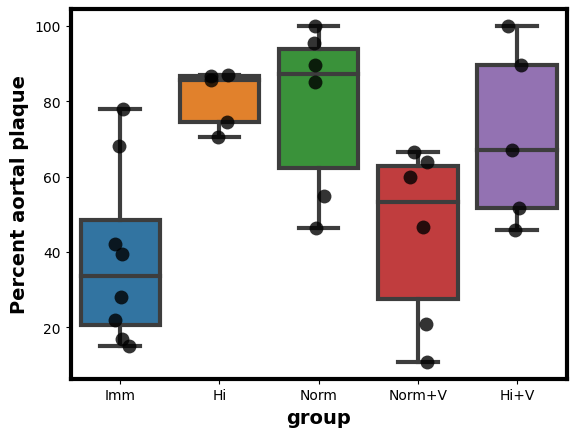

In [157]:
sns.boxplot(data=diet_data, x="group", y="plaque", showfliers=False)
sns.stripplot(data=diet_data, x="group", y="plaque", color='black', alpha=0.8, size=10)
plt.ylabel('Percent aortal plaque')
plt.xticks(range(5), ['Imm', 'Hi', 'Norm', 'Norm+V', 'Hi+V'])

In [158]:
cholest_cols = diet_data[['D0', 'D1', 'D2', 'D3']]

# Fit linear regression model
X = np.column_stack([np.ones_like(plaque), cholest_cols])
model = LinearRegression(fit_intercept=False).fit(X, plaque)

# Extract coefficients
b = model.coef_
k = len(b)

# Calculate sum of squares
SSTot = np.sum((plaque - np.mean(plaque))**2)
SSReg = np.sum((model.predict(X) - np.mean(plaque))**2)
SSRes = np.sum((plaque - model.predict(X))**2)

# Calculate R-squared and Cohen's f
R2 = SSReg / SSTot
Cohenf = SSReg / SSRes

# Calculate degrees of freedom
dfReg = k - 1
dfRes = len(plaque) - k

# Calculate F-statistic and p-value
F = (SSReg / dfReg) / (SSRes / dfRes)
p = 1 - f.cdf(F, dfReg, dfRes)

Text(0.2, 0.2, "$b_I = 38.64$\n$b_H = 42.28$\n$b_V = 39.90$\n$b_NV = 6.13$\n$b_HV = 32.18$\n$R^2 = 0.46$\nCohen's $f = 0.85$\n$F(4, 25) = 5.32$\n$p = 0.00$")

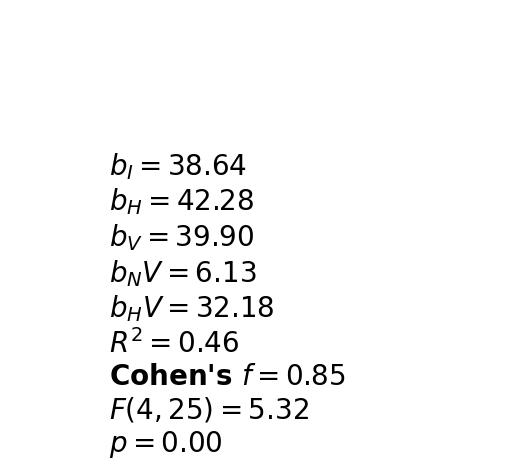

In [159]:
fig, ax = plt.subplots()
ax.axis('off')

textbox_props = dict(boxstyle='square', facecolor='white', edgecolor='none')
annotations = [
    r'$b_I = {:.2f}$'.format(b[0]),
    r'$b_H = {:.2f}$'.format(b[1]),
    r'$b_V = {:.2f}$'.format(b[2]),
    r'$b_NV = {:.2f}$'.format(b[3]),
    r'$b_HV = {:.2f}$'.format(b[4]),
    r'$R^2 = {:.2f}$'.format(R2),
    r"Cohen's $f = {:.2f}$".format(Cohenf),
    r'$F({}, {}) = {:.2f}$'.format(dfReg, dfRes, F),
    r'$p = {:.2f}$'.format(p)
]

annotation_text = '\n'.join(annotations)
ax.text(0.2, 0.2, annotation_text, transform=ax.transAxes,
        verticalalignment='center', horizontalalignment='left',
        bbox=textbox_props, fontweight='bold', fontsize=20)

In [160]:
def calc_seb(X, y, b):
  residuals = y - X @ b
  n = X.shape[0]
  k = X.shape[1]
  rse = np.sqrt(np.sum(residuals**2) / (n - k))
  invXX = np.linalg.inv(np.dot(X.T, X))
  var_b = invXX * rse**2
  se_b = np.sqrt(np.diag(var_b))
  return se_b

In [161]:
d = b / np.sqrt(SSRes / dfRes)

se_b = calc_seb(X, plaque, b)
cohensD = b / np.sqrt(SSRes / dfRes)
t_values = b / se_b

p = np.zeros_like(t_values)
for i in range(len(t_values)):
    p[i] = 1 - stats.t.cdf(t_values[i], dfRes)

Text(0.2, 0.2, '$p_I = 1.543e-05$\n$p_H = 0.001018$\n$p_V = 0.001054$\n$p_NV = 0.3015$\n$p_HV = 0.007358$')

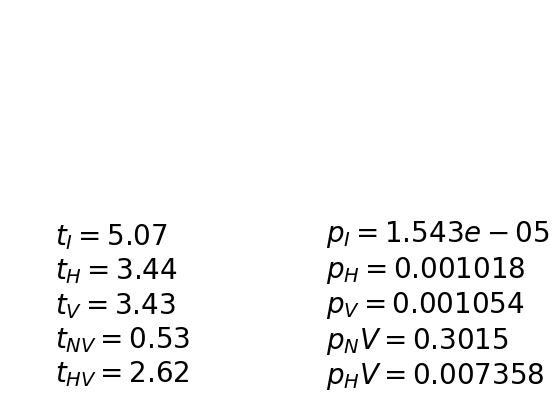

In [162]:
fig, ax = plt.subplots(1,2)

textbox_props = dict(boxstyle='square', facecolor='white', edgecolor='none')
annotations = [
    r'$t_I = {:.2f}$'.format(t_values[0]),
    r'$t_H = {:.2f}$'.format(t_values[1]),
    r'$t_V = {:.2f}$'.format(t_values[2]),
    r'$t_{{NV}} = {:.2f}$'.format(t_values[3]),
    r'$t_{{HV}} = {:.2f}$'.format(t_values[4]),
]

annotation_text = '\n'.join(annotations)

ax[0].axis('off')
ax[0].text(0.2, 0.2, annotation_text, transform=ax[0].transAxes,
        verticalalignment='center', horizontalalignment='left',
        bbox=textbox_props, fontweight='bold', fontsize=20)


textbox_props = dict(boxstyle='square', facecolor='white', edgecolor='none')
annotations = [
    r'$p_I = {:.4g}$'.format(p[0]),
    r'$p_H = {:.4g}$'.format(p[1]),
    r'$p_V = {:.4g}$'.format(p[2]),
    r'$p_NV = {:.4g}$'.format(p[3]),
    r'$p_HV = {:.4g}$'.format(p[4]),
]

annotation_text = '\n'.join(annotations)

ax[1].axis('off')
ax[1].text(0.2, 0.2, annotation_text, transform=ax[1].transAxes,
        verticalalignment='center', horizontalalignment='left',
        bbox=textbox_props, fontweight='bold', fontsize=20)

## Interactions and non-linearities

### Load seal data

In [163]:
data = pd.read_csv('seals.dat', delimiter='\s+', comment='%', header=None)
C = data.iloc[:, 0].values
T = data.iloc[:, 1].values
NumData = len(C)

### Function to calculate regression coefficients

In [164]:
# Function to calculate regression coefficients
def findReg(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

### Plotting original data


(-50.0, 30.0)

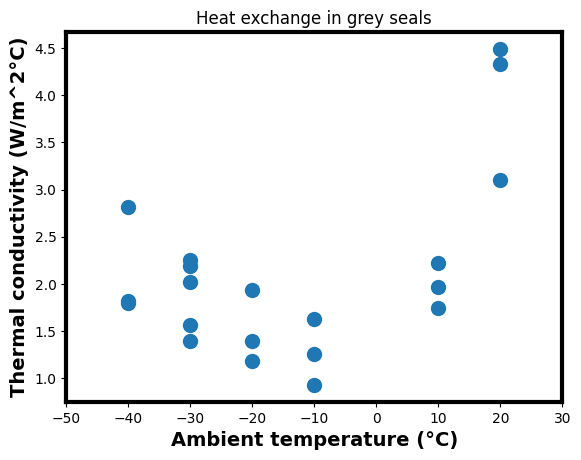

In [165]:
plt.figure()
plt.plot(T, C, 'o')
plt.xlabel('Ambient temperature (°C)')
plt.ylabel('Thermal conductivity (W/m^2°C)')
plt.title('Heat exchange in grey seals')
plt.xlim(-50, 30)

### Linear regression

In [166]:
MeanC = np.mean(C)
XLin = np.column_stack((np.ones(NumData), T))
bLin = findReg(XLin, C)
CHatLin = XLin @ bLin
ResLin = C - CHatLin
RegLin = CHatLin - MeanC
SSResLin = np.sum(ResLin ** 2)
SSRegLin = np.sum(RegLin ** 2)
SSTot = np.sum((C - MeanC) ** 2)
dfRegLin = XLin.shape[1] - 1
dfResLin = NumData - dfRegLin - 1
MSResLin = SSResLin / dfResLin
MSRegLin = SSRegLin / dfRegLin
FLin = MSRegLin / MSResLin
R2Lin = SSRegLin / SSTot
CohenFLin = SSRegLin / SSResLin
FprobLin = 1 - stats.f.cdf(FLin, dfRegLin, dfResLin)



### Quadratic regression

In [167]:
XQuad = np.column_stack((np.ones(NumData), T, T ** 2))
bQuad = findReg(XQuad, C)
CHatQuad = XQuad @ bQuad
ResQuad = C - CHatQuad
RegQuad = CHatQuad - MeanC
SSResQuad = np.sum(ResQuad ** 2)
SSRegQuad = np.sum(RegQuad ** 2)
dfRegQuad = XQuad.shape[1] - 1
dfResQuad = NumData - dfRegQuad - 1
MSResQuad = SSResQuad / dfResQuad
MSRegQuad = SSRegQuad / dfRegQuad
FQuad = MSRegQuad / MSResQuad
R2Quad = SSRegQuad / SSTot
CohenFQuad = SSRegLin / SSResQuad
FprobQuad = 1 - stats.f.cdf(FQuad, dfRegQuad, dfResQuad)

### Plotting regression lines

(-50.0, 30.0)

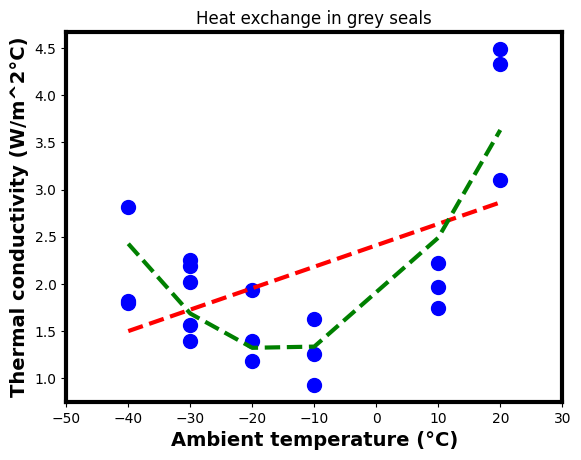

In [168]:
plt.figure()
plt.plot(T, C, 'bo', T, CHatLin, 'r--', T, CHatQuad, 'g--')
plt.xlabel('Ambient temperature (°C)')
plt.ylabel('Thermal conductivity (W/m^2°C)')
plt.title('Heat exchange in grey seals')
plt.xlim(-50, 30)

### Standard errors and t-statistics


In [192]:
s_b = MSResQuad * np.linalg.inv(XQuad.T @ XQuad)
se_b = np.sqrt(np.diag(s_b))
bt = bQuad / se_b
tProb = 1 - t.cdf(np.abs(bt), dfRes)
tCrit = t.ppf([0.025, 0.975], dfRes)
tConf = np.column_stack([bQuad, bQuad]) + se_b.reshape((-1,1)) * tCrit

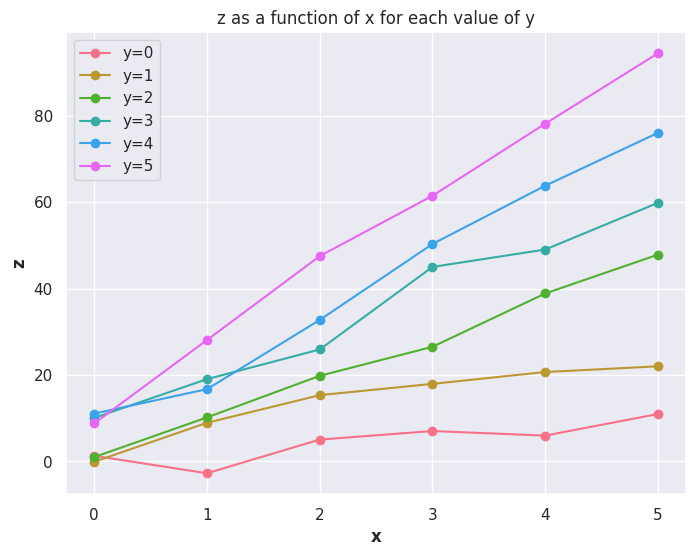

<ipython-input-200-101754b4c9fd>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X[i, :], Y[i, :], Z[i, :], c=c, label='y={}'.format(i))


[-40, 20]


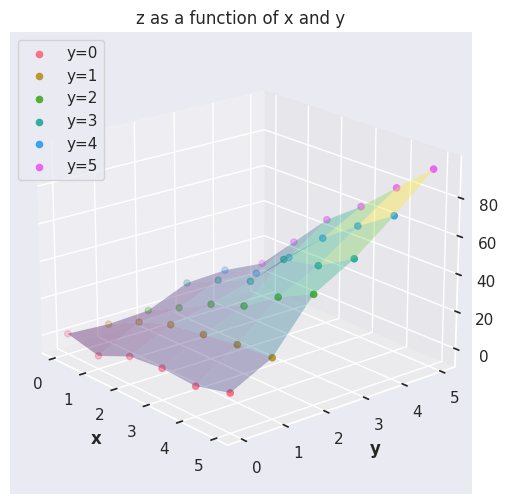

In [200]:
# Generate data
x = np.arange(6).astype(float)
y = np.arange(6).astype(float)
X, Y = np.meshgrid(x, y)
Z = (2 + 3*Y) * X + 2*Y
Z += stats.norm.rvs(scale=3, size=Z.shape)

# Plot z as a function of x for each value of y
sns.set(style='darkgrid')
colors = sns.color_palette('husl', len(y))
plt.figure(figsize=(8, 6))
for i, c in enumerate(colors):
    plt.plot(x, Z[i, :], marker='o', color=c, label='y={}'.format(i))
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.title('z as a function of x for each value of y')
plt.show()

# Plot z as a function of x and y in a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for i, c in enumerate(colors):
    ax.scatter(X[i, :], Y[i, :], Z[i, :], c=c, label='y={}'.format(i))
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.35, edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.set_title('z as a function of x and y')

ax.view_init(elev=20, azim=-40)

print([ax.azim, ax.elev])